<div dir=rtl align=center>

<img src='https://upload.wikimedia.org/wikipedia/fa/thumb/a/a9/Sharif_logo.svg/626px-Sharif_logo.svg.png?20110526112825' alt="SUT logo" width=200 height=200 align=center  >
<br>
<font face="B Yekan">
<font color=0F5298 size=7>
یادگیری ماشین<br>
<font color=2565AE size=5>
دانشکده مهندسی صنایع<br>
<font color=2565AE size=4>
دکتر مهدی شریف زاده <br>
<font  size=4>
 امیرحسین محمودی <br>
بهار 1402<br>

<font color=3C99D size=5>
شبکه عصبی با keras
<br>
    
    
    
____


In [8]:
!pip install tensorflow


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: C:\Users\HP OMEN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


# Building an Image Classifier

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [3]:
import gzip
def load_fashion_mnist():
    with gzip.open('data/fashion/train-images-idx3-ubyte.gz', 'rb') as f:
        x_train = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28, 28)
    with gzip.open('data/fashion/train-labels-idx1-ubyte.gz', 'rb') as f:
        y_train = np.frombuffer(f.read(), np.uint8, offset=8)
    with gzip.open('data/fashion/t10k-images-idx3-ubyte.gz', 'rb') as f:
        x_test = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28, 28)
    with gzip.open('data/fashion/t10k-labels-idx1-ubyte.gz', 'rb') as f:
        y_test = np.frombuffer(f.read(), np.uint8, offset=8)
    return (x_train, y_train), (x_test, y_test)

(X_train_full, y_train_full), (X_test, y_test) = load_fashion_mnist()

The training set contains 60,000 grayscale images, each 28x28 pixels:

In [11]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [12]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [13]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

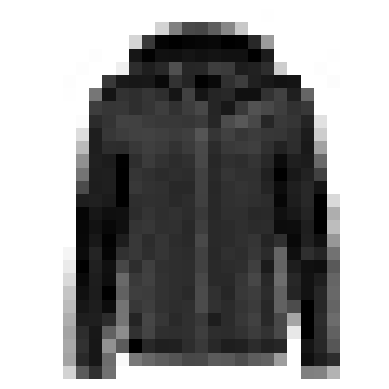

In [14]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [15]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [16]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [17]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [18]:
X_valid.shape, X_test.shape

((5000, 28, 28), (10000, 28, 28))

Let's take a look at a sample of the images in the dataset:

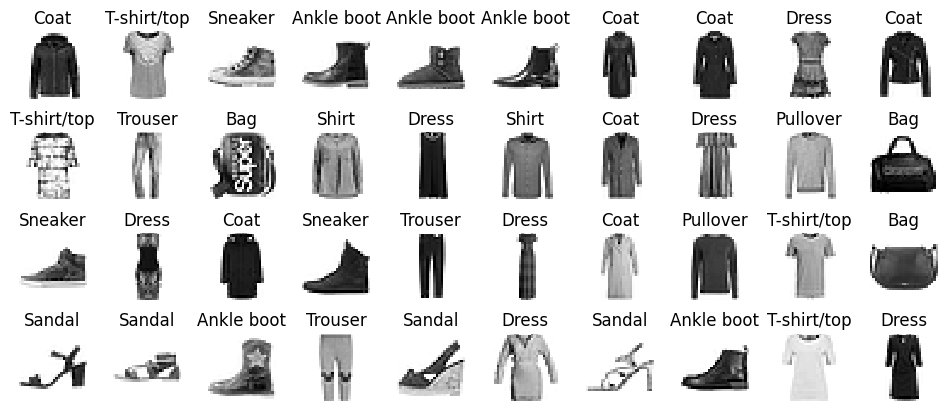

In [19]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [4]:
#TODO 1: Create a neural network with 2 hidden layers of 300 and 100 neurons respectively, 
# and an output layer of 10 neurons. Use the ReLU activation function for the hidden layers 
# and the softmax activation function for the output layer. use model.add() to add layers to your model.
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

#TODO 2 : Do the same as above but define the layers in the constructor of the Sequential() model.
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [21]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [22]:
model.layers

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


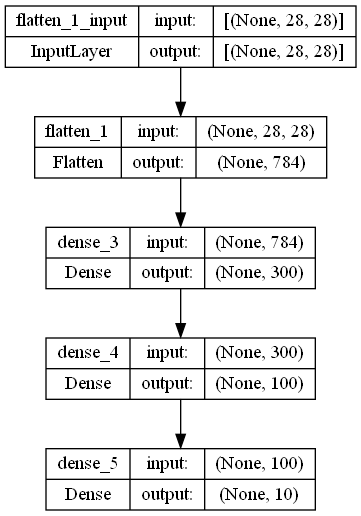

In [24]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [25]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [26]:
weights, biases = hidden1.get_weights()

In [27]:
weights

array([[ 0.02004067,  0.06082264, -0.06083733, ..., -0.06312214,
         0.01908664,  0.06241751],
       [-0.04003721, -0.07143477,  0.06781676, ..., -0.00121383,
        -0.02241753,  0.06835322],
       [-0.0648002 ,  0.05167499,  0.06403831, ..., -0.01075013,
        -0.01462903, -0.03501912],
       ...,
       [ 0.05641522,  0.01015322, -0.05336618, ..., -0.04947506,
        -0.01982464, -0.0367296 ],
       [-0.02538289, -0.00430423, -0.0642155 , ...,  0.00877921,
        -0.06200214,  0.05199191],
       [ 0.0052989 , -0.0318688 , -0.02681935, ..., -0.04360812,
         0.06508717,  0.01736245]], dtype=float32)

In [28]:
weights.shape

(784, 300)

In [29]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [30]:
biases.shape

(300,)

In [31]:
# TODO 3: Compile the model using the "sparse_categorical_crossentropy" loss,
# the "sgd" optimizer, and the "accuracy" metric.
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

In [32]:
# TODO 4: Train the model for 5 epochs on the training set, and validate it on the validation set.
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

Epoch 1/5
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7162 - accuracy: 0.7635 - val_loss: 0.5283 - val_accuracy: 0.8196
Epoch 2/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4884 - accuracy: 0.8288 - val_loss: 0.4401 - val_accuracy: 0.8494
Epoch 3/5
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4433 - accuracy: 0.8442 - val_loss: 0.5519 - val_accuracy: 0.7918
Epoch 4/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4170 - accuracy: 0.8543 - val_loss: 0.3975 - val_accuracy: 0.8612
Epoch 5/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3991 - accuracy: 0.8605 - val_loss: 0.3758 - val_accuracy: 0.8662


In [33]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 1719}

In [34]:
print(history.epoch)

[0, 1, 2, 3, 4]


In [35]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

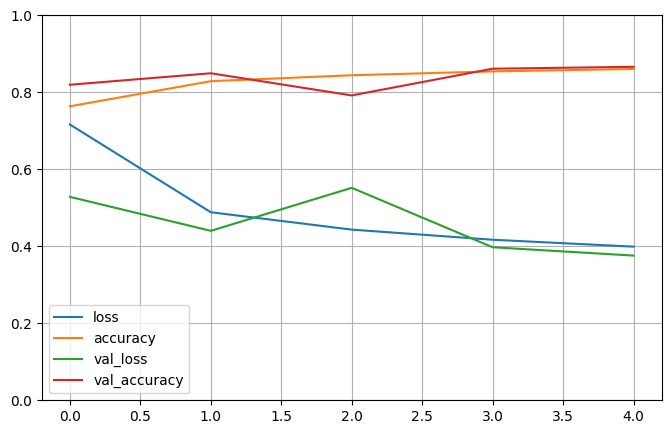

In [36]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [37]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4152 - accuracy: 0.8526


[0.4151727557182312, 0.8525999784469604]

In [38]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 100ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.1 , 0.  , 0.23, 0.  , 0.67],
       [0.  , 0.  , 0.96, 0.  , 0.01, 0.  , 0.03, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

**Warning**: `model.predict_classes(X_new)` is deprecated. It is replaced with `np.argmax(model.predict(X_new), axis=-1)`.

In [39]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 38ms/step


array([9, 2, 1], dtype=int64)

In [40]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [41]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

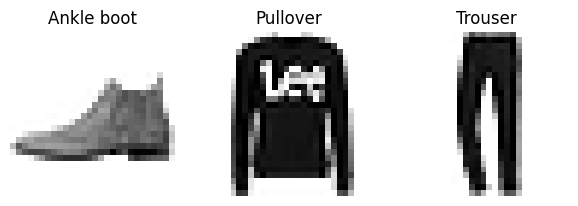

In [42]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Regression MLP

Let's load, split and scale the California housing dataset (the original one, not the modified one as in chapter 2):

In [43]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [44]:
np.random.seed(42)
tf.random.set_seed(42)


In [ ]:
X_train.shape

In [45]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.5889 - val_loss: 0.9113
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7624 - val_loss: 0.7970
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6836 - val_loss: 0.6588
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6337 - val_loss: 0.6432
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5973 - val_loss: 0.6080
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5655 - val_loss: 0.5516
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5400 - val_loss: 0.5251
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5187 - val_loss: 0.5321
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4999 - val_loss: 0.4848
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4847 - val_loss: 0.4656

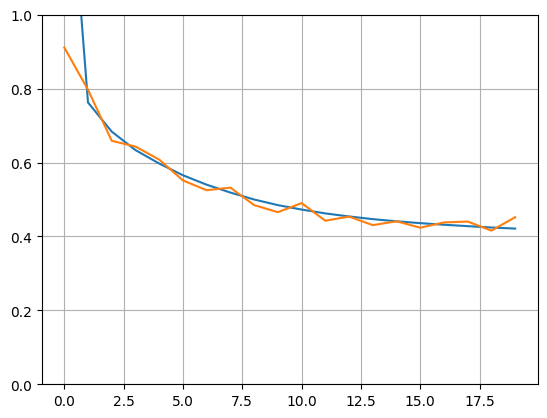

In [46]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [47]:
y_pred

array([[0.5143826],
       [1.5930163],
       [3.3363092]], dtype=float32)

# Functional API

Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs. For example, a Wide & Deep neural network (see [paper](https://ai.google/research/pubs/pub45413)) connects all or part of the inputs directly to the output layer.

In [48]:
np.random.seed(42)
tf.random.set_seed(42)

In [49]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [50]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_2 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_3 (Dense)                (None, 30)           930         ['dense_2[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_3[0][0]']            

In [51]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/5
363/363 [==============================] - 2s 3ms/step - loss: 2.1730 - val_loss: 3.3023
Epoch 2/5
363/363 [==============================] - 1s 3ms/step - loss: 0.7971 - val_loss: 0.7096
Epoch 3/5
363/363 [==============================] - 1s 3ms/step - loss: 0.6927 - val_loss: 0.6584
Epoch 4/5
363/363 [==============================] - 1s 3ms/step - loss: 0.6414 - val_loss: 0.5870
Epoch 5/5
1/1 [==============================] - 0s 87ms/step


What if you want to send different subsets of input features through the wide or deep paths? We will send 5 features (features 0 to 4), and 6 through the deep path (features 2 to 7). Note that 3 features will go through both (features 2, 3 and 4).

In [52]:
np.random.seed(42)
tf.random.set_seed(42)

In [53]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [54]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=5,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/5
363/363 [==============================] - 2s 3ms/step - loss: 2.1931 - val_loss: 2.0970
Epoch 2/5
363/363 [==============================] - 1s 3ms/step - loss: 0.8457 - val_loss: 0.7800
Epoch 3/5
363/363 [==============================] - 1s 4ms/step - loss: 0.6696 - val_loss: 0.6342
Epoch 4/5
363/363 [==============================] - 1s 3ms/step - loss: 0.6028 - val_loss: 0.5513
Epoch 5/5
1/1 [==============================] - 0s 68ms/step


Adding an auxiliary output for regularization:

In [55]:
np.random.seed(42)
tf.random.set_seed(42)

In [56]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [57]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [58]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=5,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/5
363/363 [==============================] - 2s 3ms/step - loss: 2.6776 - main_output_loss: 2.4341 - aux_output_loss: 4.8683 - val_loss: 1.7708 - val_main_output_loss: 1.3863 - val_aux_output_loss: 5.2315
Epoch 2/5
363/363 [==============================] - 1s 3ms/step - loss: 1.0634 - main_output_loss: 0.7866 - aux_output_loss: 3.5550 - val_loss: 1.1530 - val_main_output_loss: 0.6798 - val_aux_output_loss: 5.4120
Epoch 3/5
363/363 [==============================] - 1s 3ms/step - loss: 0.8283 - main_output_loss: 0.6418 - aux_output_loss: 2.5069 - val_loss: 1.0969 - val_main_output_loss: 0.5839 - val_aux_output_loss: 5.7139
Epoch 4/5
363/363 [==============================] - 1s 3ms/step - loss: 0.7283 - main_output_loss: 0.5925 - aux_output_loss: 1.9505 - val_loss: 1.0763 - val_main_output_loss: 0.5662 - val_aux_output_loss: 5.6673
Epoch 5/5
363/363 [==============================] - 1s 3ms/step - loss: 0.6756 - main_output_loss: 0.5669 - aux_output_loss: 1.6546 - val_loss: 1.0

In [59]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 136ms/step


# The subclassing API

In [60]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [61]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=5,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/5
363/363 [==============================] - 2s 3ms/step - loss: 2.8544 - output_1_loss: 2.7733 - output_2_loss: 3.5838 - val_loss: 4.6630 - val_output_1_loss: 4.0838 - val_output_2_loss: 9.8756
Epoch 2/5
363/363 [==============================] - 1s 3ms/step - loss: 1.0293 - output_1_loss: 0.9248 - output_2_loss: 1.9699 - val_loss: 2.5762 - val_output_1_loss: 2.0648 - val_output_2_loss: 7.1793
Epoch 3/5
363/363 [==============================] - 1s 3ms/step - loss: 0.8057 - output_1_loss: 0.7292 - output_2_loss: 1.4941 - val_loss: 1.4051 - val_output_1_loss: 0.9806 - val_output_2_loss: 5.2254
Epoch 4/5
363/363 [==============================] - 1s 3ms/step - loss: 0.7100 - output_1_loss: 0.6477 - output_2_loss: 1.2712 - val_loss: 1.0463 - val_output_1_loss: 0.6973 - val_output_2_loss: 4.1868
Epoch 5/5
1/1 [==============================] - 0s 79ms/step


# Saving and Restoring

In [62]:
np.random.seed(42)
tf.random.set_seed(42)

In [63]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [64]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/5
363/363 [==============================] - 1s 3ms/step - loss: 1.9054 - val_loss: 0.7880
Epoch 2/5
363/363 [==============================] - 1s 2ms/step - loss: 0.7417 - val_loss: 0.7068
Epoch 3/5
363/363 [==============================] - 1s 2ms/step - loss: 0.6585 - val_loss: 0.6267
Epoch 4/5
363/363 [==============================] - 1s 3ms/step - loss: 0.6052 - val_loss: 0.5569
Epoch 5/5
162/162 [==============================] - 0s 2ms/step - loss: 0.5353


In [65]:
model.save("my_keras_model.h5")

In [66]:
model = keras.models.load_model("my_keras_model.h5")

In [67]:
model.predict(X_new)

1/1 [==============================] - 0s 80ms/step


array([[0.75426114],
       [1.1308676 ],
       [2.6563523 ]], dtype=float32)

In [68]:
model.save_weights("my_keras_weights.ckpt")

In [69]:
model.load_weights("my_keras_weights.ckpt")

# Using Callbacks during Training

In [70]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [71]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [72]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/5
363/363 [==============================] - 2s 3ms/step - loss: 1.4597 - val_loss: 0.8851
Epoch 2/5
363/363 [==============================] - 1s 3ms/step - loss: 0.7917 - val_loss: 0.7218
Epoch 3/5
363/363 [==============================] - 1s 3ms/step - loss: 0.6945 - val_loss: 0.6347
Epoch 4/5
363/363 [==============================] - 1s 3ms/step - loss: 0.6313 - val_loss: 0.5879
Epoch 5/5
162/162 [==============================] - 1s 2ms/step - loss: 0.5471


In [73]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/5
363/363 [==============================] - 2s 4ms/step - loss: 0.5483 - val_loss: 0.5166
Epoch 2/5
363/363 [==============================] - 1s 3ms/step - loss: 0.5189 - val_loss: 0.4977
Epoch 3/5
363/363 [==============================] - 1s 3ms/step - loss: 0.4952 - val_loss: 0.4721
Epoch 4/5
363/363 [==============================] - 1s 3ms/step - loss: 0.4753 - val_loss: 0.4469
Epoch 5/5
162/162 [==============================] - 0s 2ms/step - loss: 0.4393


In [74]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [75]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

341/363 [===========================>..] - ETA: 0s - loss: 0.4420
val/train: 0.93
363/363 [==============================] - 1s 3ms/step - loss: 0.4460 - val_loss: 0.4135


# TensorBoard

In [76]:
import os

In [77]:
root_logdir = os.path.join(os.curdir, "my_logs")

In [78]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2023_05_07-16_00_49'

In [79]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [80]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [81]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/5
363/363 [==============================] - 2s 5ms/step - loss: 1.6753 - val_loss: 0.9780
Epoch 2/5
363/363 [==============================] - 1s 3ms/step - loss: 0.7504 - val_loss: 0.8390
Epoch 3/5
363/363 [==============================] - 1s 3ms/step - loss: 0.6760 - val_loss: 0.6324
Epoch 4/5
363/363 [==============================] - 1s 3ms/step - loss: 0.6188 - val_loss: 0.5799
Epoch 5/5
363/363 [==============================] - 1s 3ms/step - loss: 0.5763 - val_loss: 0.5378


To start the TensorBoard server, one option is to open a terminal, if needed activate the virtualenv where you installed TensorBoard, go to this notebook's directory, then type:

```bash
$ tensorboard --logdir=./my_logs --port=6006
```

You can then open your web browser to [localhost:6006](http://localhost:6006) and use TensorBoard. Once you are done, press Ctrl-C in the terminal window, this will shutdown the TensorBoard server.

Alternatively, you can load TensorBoard's Jupyter extension and run it like this:

In [82]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

In [83]:
run_logdir2 = get_run_logdir()
run_logdir2

'.\\my_logs\\run_2023_05_07-16_01_26'

In [84]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [85]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.05))

In [86]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/5
363/363 [==============================] - 2s 4ms/step - loss: 0.5264 - val_loss: 0.6429
Epoch 2/5
363/363 [==============================] - 1s 3ms/step - loss: 0.3934 - val_loss: 3.3349
Epoch 3/5
363/363 [==============================] - 1s 3ms/step - loss: 0.4110 - val_loss: 0.7618
Epoch 4/5
363/363 [==============================] - 1s 3ms/step - loss: 0.3656 - val_loss: 1.0407
Epoch 5/5
363/363 [==============================] - 1s 3ms/step - loss: 0.3583 - val_loss: 6.1510


Notice how TensorBoard now sees two runs, and you can compare the learning curves.

Check out the other available logging options:

In [87]:
help(keras.callbacks.TensorBoard.__init__)

Help on function __init__ in module keras.callbacks:

__init__(self, log_dir='logs', histogram_freq=0, write_graph=True, write_images=False, write_steps_per_second=False, update_freq='epoch', profile_batch=0, embeddings_freq=0, embeddings_metadata=None, **kwargs)
    Initialize self.  See help(type(self)) for accurate signature.



# Hyperparameter Tuning

In [88]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [89]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [90]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

C:\Users\HP OMEN\AppData\Local\Temp\ipykernel_9628\1709004121.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [91]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 2s 3ms/step - loss: 1.2042 - val_loss: 3.3303
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 0.6141 - val_loss: 3.0121
Epoch 3/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5250 - val_loss: 1.8989
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4797 - val_loss: 2.1129
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4547 - val_loss: 1.4396
Epoch 6/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4421 - val_loss: 1.8570
Epoch 7/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4367 - val_loss: 1.1958
Epoch 8/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4205 - val_loss: 0.8761
Epoch 9/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4134 - val_loss: 0.5662
Epoch 10/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4067 - val_lo

In [92]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3732


In [93]:
y_pred = keras_reg.predict(X_new)

1/1 [==============================] - 0s 54ms/step


In [94]:
np.random.seed(42)
tf.random.set_seed(42)

**Warning**: the following cell crashes at the end of training. This seems to be caused by [Keras issue #13586](https://github.com/keras-team/keras/issues/13586), which was triggered by a recent change in Scikit-Learn. [Pull Request #13598](https://github.com/keras-team/keras/pull/13598) seems to fix the issue, so this problem should be resolved soon. In the meantime, I've added `.tolist()` and `.rvs(1000).tolist()` as workarounds.

In [95]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100)               .tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2)      .rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/100
242/242 [==============================] - 1s 4ms/step - loss: 1.7487 - val_loss: 104.0942
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 1.2422 - val_loss: 0.5509
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5499 - val_loss: 0.4360
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4632 - val_loss: 0.4094
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4451 - val_loss: 0.4002
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4474 - val_loss: 0.4151
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4422 - val_loss: 0.4079
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4357 - val_loss: 0.4017
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4376 - val_loss: 0.4086
Epoch 10/100
242/242 [======

KeyboardInterrupt: 

In [ ]:
rnd_search_cv.best_params_

{'n_neurons': 74, 'n_hidden': 3, 'learning_rate': 0.005803602934201024}

In [ ]:
rnd_search_cv.best_score_

-0.32039451599121094

In [ ]:
rnd_search_cv.best_estimator_

In [ ]:
rnd_search_cv.score(X_test, y_test)

162/162 [==============================] - 0s 436us/step - loss: 0.3029


-0.3028871417045593

In [ ]:
model = rnd_search_cv.best_estimator_.model
model

In [ ]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 446us/step - loss: 0.3029


0.3028871417045593